## <b> EDA-Ecommerce analysis

In [317]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

default_color = sns.color_palette("deep")[0]
highlight_color = sns.color_palette("pastel")[1]
sns.set_style("white")
sns.set_palette([default_color])

## Data preprocessing

#### <b> Import Dataset

In [318]:
# import dataset
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### <b> Check missing values and datatype

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are missing values in the ```Description``` and ```CustomerID``` variables

#### <b> Handling missing values

In [320]:
# delete rows without customerID, do not represent transactions
df = df.dropna(subset=['CustomerID'])

A data row without a CustomerID cannot be attributed to any customer, making it useless for analysis. Without the ID, transaction data is anonymous and cannot be used to build customer behavioral profiles.

In [321]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [322]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### <b> Fix variable datatype

In [323]:
# Change the InvoiceDate and CustomerID data types to facilitate analysis.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

The ```InvoiceDate``` column is initially read as text (a string). Converting it to a datetime type allows us to perform time-based operations, such as extracting the month, day, or hour.

```CustomerID``` may be read as a float (decimal number) due to the presence of a preceding blank value. After removing the blank line, we convert it to an int (whole number) for better clarity and to better serve its purpose as an ID.

#### <b> Remove Irrelevant data

In [324]:
# Delete canceled transactions (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

Canceled transactions (InvoiceNo begins with 'C') usually have a negative quantity and are not sales.

In [325]:
# Delete rows with invalid quantity or price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

True sales must have a positive quantity, and retailers cannot sell items with a unit price of 0 (free).

In [326]:
# List of Stock Codes on products
non_product_codes = ['POST', 'D', 'M', 'MANUAL', 'BANK CHARGES', 'DOT', 'CRUK']
data_non_produk = df[df['StockCode'].isin(non_product_codes)]

# Show results
data_non_produk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom


In [327]:
# Remove nonproduct transaction
df_clean = df[~df['StockCode'].isin(non_product_codes)]

The dataset contains non-product transactions, including service charges such as postage (POST) and bank charges (BANK CHARGES). These rows should be removed to avoid compromising the accuracy of the product analysis.

In [328]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Feature engineering

In [329]:
df_final = df_clean.copy()
df_final.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396473.000000,396473,396473.000000,396473.000000
mean,13.008429,2011-07-11 00:04:51.674338560,2.884056,15301.447577
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:40:00,3.750000,16801.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.610569,NaN,4.354463,1709.768557


#### <b> create totalPrice variable

In [330]:
df_final['TotalPrice'] = df_final['Quantity'] * df_final['UnitPrice']
df_final[['Quantity', 'UnitPrice', 'TotalPrice']].head()

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


Now each data has a total Price variable, and the total cost to be paid is based on the quantity of goods.

#### <b> Unit price level labeling

In [331]:
df_final["UnitPrice"].describe()

count    396473.000000
mean          2.884056
std           4.354463
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [332]:
# Create price categories based on UnitPrice distribution
bins = [0, 1.25, 3.75, 10, float('inf')] # Using the 25% and 75% quartiles as a reference
labels = ['Sangat Murah', 'Murah', 'Menengah', 'Mahal']

# Creating a PriceTier column using pd.cut
df_final['PriceTier'] = pd.cut(df_final['UnitPrice'], bins=bins, labels=labels, right=False)

In [333]:
df_final[df_final["PriceTier"] == "Mahal"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceTier
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,350.4,Mahal
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2010-12-01 09:45:00,14.95,16098,United Kingdom,29.9,Mahal
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,2010-12-01 09:45:00,14.95,16098,United Kingdom,29.9,Mahal
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,2010-12-01 09:45:00,16.95,16098,United Kingdom,67.8,Mahal
163,536384,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,2,2010-12-01 09:53:00,12.75,18074,United Kingdom,25.5,Mahal


Create 4 price categories for each item Using the 25% and 75% quartiles as a reference

#### <b> Time feature extraction from invoiceDate

In [334]:
df_final['Hour'] = df_final['InvoiceDate'].dt.hour # filter hours
df_final['Day'] = df_final['InvoiceDate'].dt.day_name() # filtler day
df_final['Month'] = df_final['InvoiceDate'].dt.month_name() # filter month
df_final['Year'] = df_final['InvoiceDate'].dt.year # filter year

df_final[['InvoiceDate', 'Hour', 'Month', 'Day', 'Year']].head()

,InvoiceDate,Hour,Month,Day,Year
0,2010-12-01 08:26:00,8,December,Wednesday,2010
1,2010-12-01 08:26:00,8,December,Wednesday,2010
2,2010-12-01 08:26:00,8,December,Wednesday,2010
3,2010-12-01 08:26:00,8,December,Wednesday,2010
4,2010-12-01 08:26:00,8,December,Wednesday,2010


In [335]:
df_final[df_final["Day"] == "Friday"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceTier,Hour,Day,Month,Year
5217,536847,22155,STAR DECORATION RUSTIC,48,2010-12-03 09:31:00,0.42,17135,United Kingdom,20.16,Sangat Murah,9,Friday,December,2010
5218,536847,21807,WHITE CHRISTMAS STAR DECORATION,36,2010-12-03 09:31:00,0.42,17135,United Kingdom,15.12,Sangat Murah,9,Friday,December,2010
5219,536847,22161,HEART DECORATION RUSTIC HANGING,24,2010-12-03 09:31:00,0.65,17135,United Kingdom,15.60,Sangat Murah,9,Friday,December,2010
5220,536847,22065,CHRISTMAS PUDDING TRINKET POT,24,2010-12-03 09:31:00,1.45,17135,United Kingdom,34.80,Murah,9,Friday,December,2010
5221,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2010-12-03 09:31:00,1.25,17135,United Kingdom,15.00,Murah,9,Friday,December,2010


To see daily, monthly, and weekly patterns in subsequent analysis, data for the day, hour, and month will be extracted from invoiceDate.

#### <b> Recency, Frequency, Monetary dataset

In [336]:
# RFM data per customer with a snapshot date of one day after the last transaction
snapshot_date = df_final['InvoiceDate'].max() + pd.DateOffset(days=1)

In [337]:
# create RFM data
rfm_df = df_final.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency
    'InvoiceNo': 'nunique', # Frequency
    'TotalPrice': 'sum' # Monetary
})

In [338]:
# change column name
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)

In [339]:
# result
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1437.24
12349,19,1,1457.55
12350,310,1,294.40


Recency: the number of days since a customer's last transaction.     
Frequency: the total number of transactions (or unique invoices) a customer has ever made.     
Monetary: the amount of money a customer has spent across all transactions.     

#### <b> Scoring each variable RFM

In [340]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4334.000000,4334.000000,4334.000000
mean,92.703046,4.246654,2023.016302
std,100.177047,7.642535,8924.198162
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,305.867500
50%,51.000000,2.000000,668.125000
75%,143.000000,5.000000,1631.622500
max,374.000000,206.000000,279138.020000


create score for each component (recency, frequency, monetary) divided by quartile, where a value of 1 is for data below 25%

In [341]:
# RFM score (1-4, where 4 is the best)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Make sure the R, F, M scores are numeric before adding them up.
r_score_num = rfm_df['R_Score'].astype(int)
f_score_num = rfm_df['F_Score'].astype(int)
m_score_num = rfm_df['M_Score'].astype(int)

# total score RFM per customer
rfm_df['RFM_Score'] = r_score_num + f_score_num + m_score_num
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,6
12347,2,7,4310.00,4,4,4,12
12348,75,4,1437.24,2,3,3,8
12349,19,1,1457.55,3,1,3,7
12350,310,1,294.40,1,1,1,3


#### <b> Average Order Value each customer

In [342]:
# Calculating Average Order Value (AOV)
rfm_df['AOV'] = rfm_df['Monetary'] / rfm_df['Frequency']

to calculate the average spending per transaction made by all customers in the dataset

#### <b> Add Customer Country Information

In [343]:
# Adding Customer Country Information
customer_country = df_final[['CustomerID', 'Country']].drop_duplicates().set_index('CustomerID')
rfm_df = rfm_df.join(customer_country)

In [344]:
# Count the number of customers for each country, separate those < 50
country_counts = rfm_df['Country'].value_counts()
countries_to_group = country_counts[country_counts < 50].index

In [345]:
# Rename those countries to 'Other'
rfm_df.loc[rfm_df['Country'].isin(countries_to_group), 'Country'] = 'Other'

Because there are many countries with an insignificant number of customers, all these countries will be grouped into 1 category, namely other.

#### <b> Feature engineering Result

In [346]:
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,AOV,Country
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,4,6,77183.600000,United Kingdom
12347,2,7,4310.00,4,4,4,12,615.714286,Other
12348,75,4,1437.24,2,3,3,8,359.310000,Other
12349,19,1,1457.55,3,1,3,7,1457.550000,Other
12350,310,1,294.40,1,1,1,3,294.400000,Other


In [347]:
df_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceTier,Hour,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Murah,8,Wednesday,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Murah,8,Wednesday,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Murah,8,Wednesday,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Murah,8,Wednesday,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Murah,8,Wednesday,December,2010


## Descriptive statistics

#### <b> Descriptive stats data RFM

In [348]:
# Summary stats numerical variabel
rfm_df[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'AOV']].describe()

,Recency,Frequency,Monetary,RFM_Score,AOV
count,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000
mean,92.623906,4.249885,2024.486970,7.517964,417.367263
std,100.109915,7.637730,8916.320735,2.829897,1799.254210
min,1.000000,1.000000,3.750000,3.000000,3.750000
25%,18.000000,1.000000,306.452500,5.000000,178.230000
50%,51.000000,2.000000,668.570000,7.000000,291.616500
75%,142.750000,5.000000,1640.937500,10.000000,426.335114
max,374.000000,206.000000,279138.020000,12.000000,84236.250000


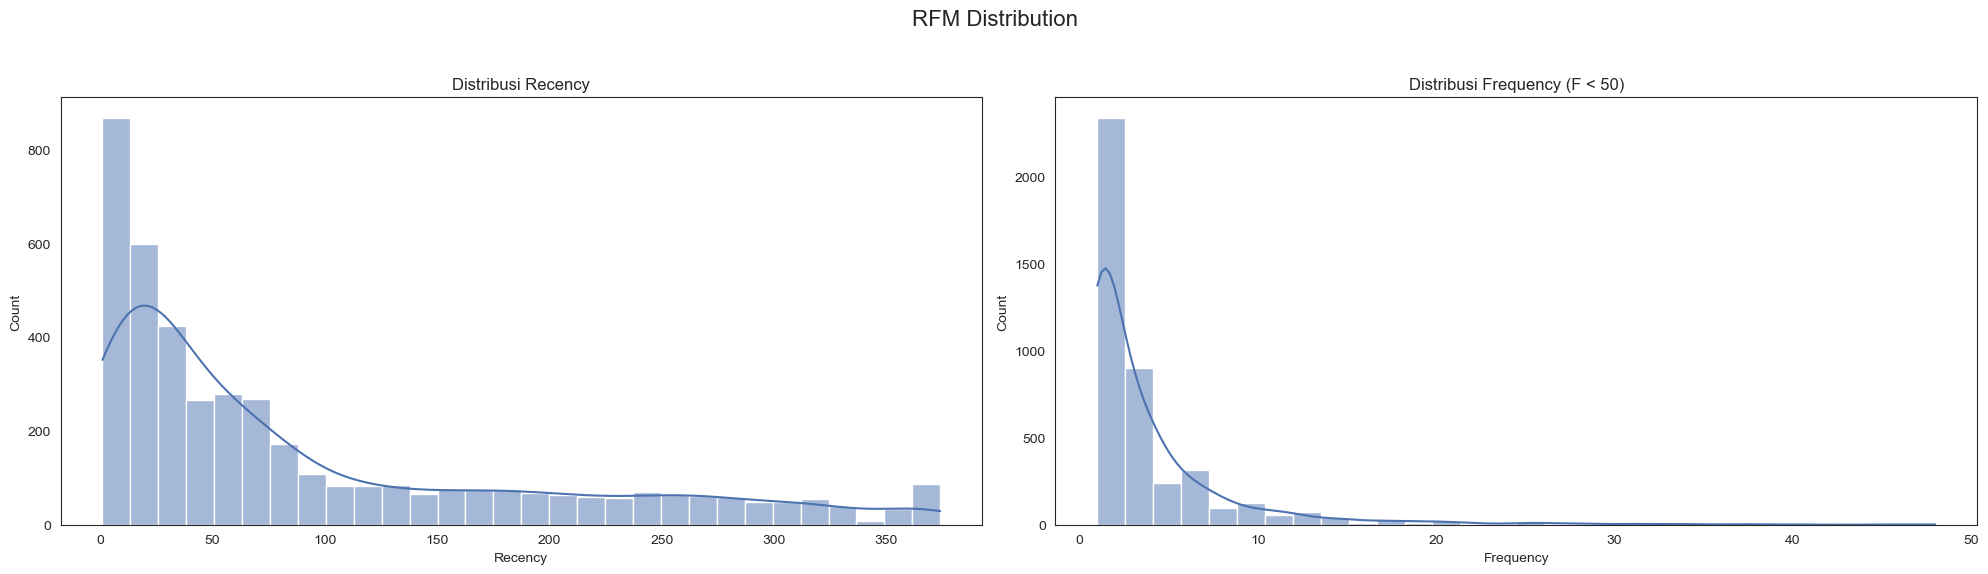

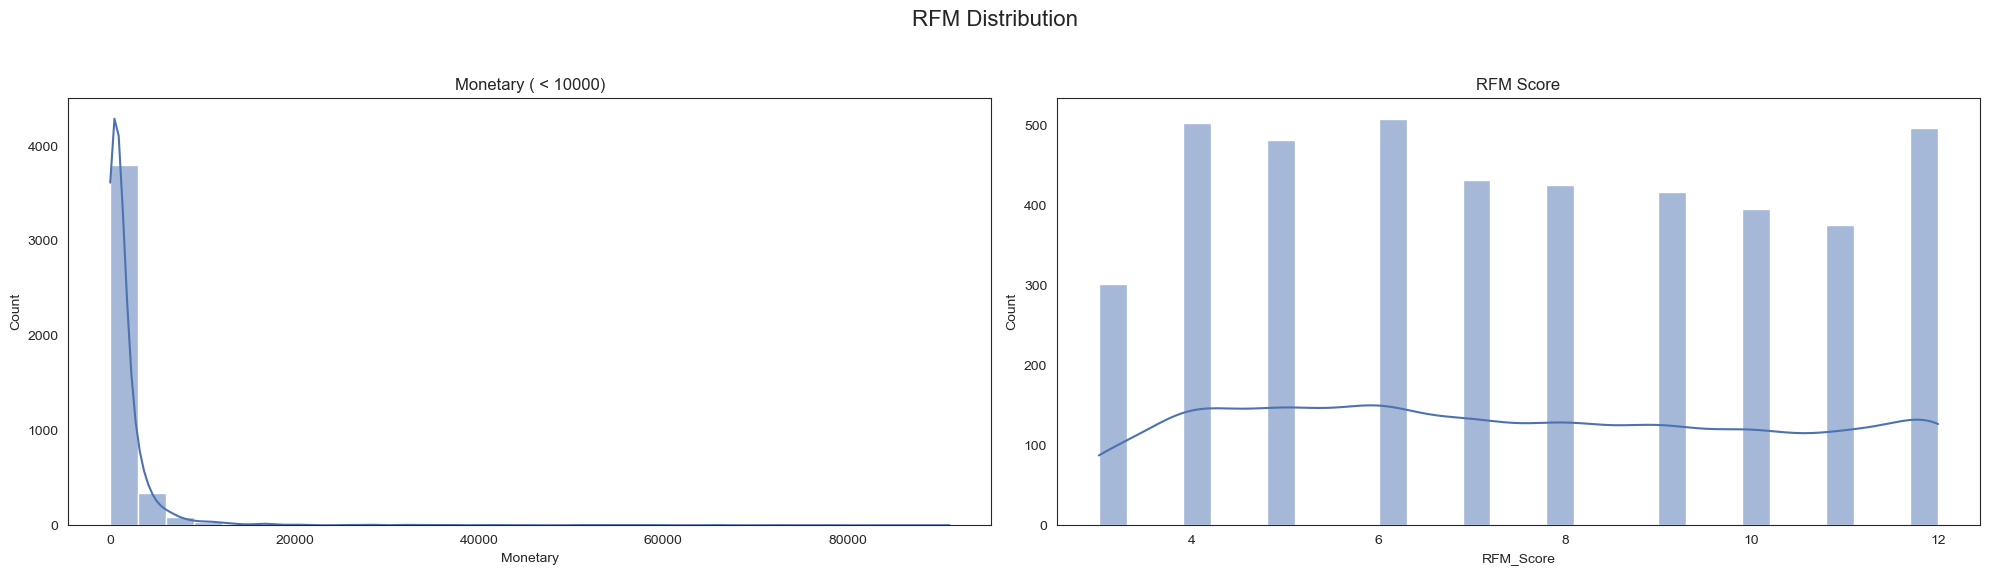

In [349]:
# plot settings
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('RFM Distribution', fontsize=16)

# recency
sns.histplot(rfm_df['Recency'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribusi Recency')

# frequency
sns.histplot(rfm_df[rfm_df['Frequency'] < 50]['Frequency'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribusi Frequency (F < 50)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(20, 6))
fig2.suptitle('RFM Distribution', fontsize=16)

# monetary
sns.histplot(rfm_df[rfm_df['Monetary'] < 100000]["Monetary"], bins=30, ax=axes2[0], kde=True)
axes2[0].set_title('Monetary ( < 10000)')

# RFM Score
sns.histplot(rfm_df['RFM_Score'], bins=30, ax=axes2[1], kde=True)
axes2[1].set_title('RFM Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The distribution of recency, frequency, and monetary variables tends to be left-skewed, meaning that the majority of customers only shop a few times, spending relatively small amounts of money. However, based on recency, there tend to be more active customers.

The median for frequency is 2 and monetary is 668, meaning that the majority of customers in this dataset
 only come twice with a total spending of 668 pounds. (we use median as centrality because there is outlier such as b2b transaction invoice)

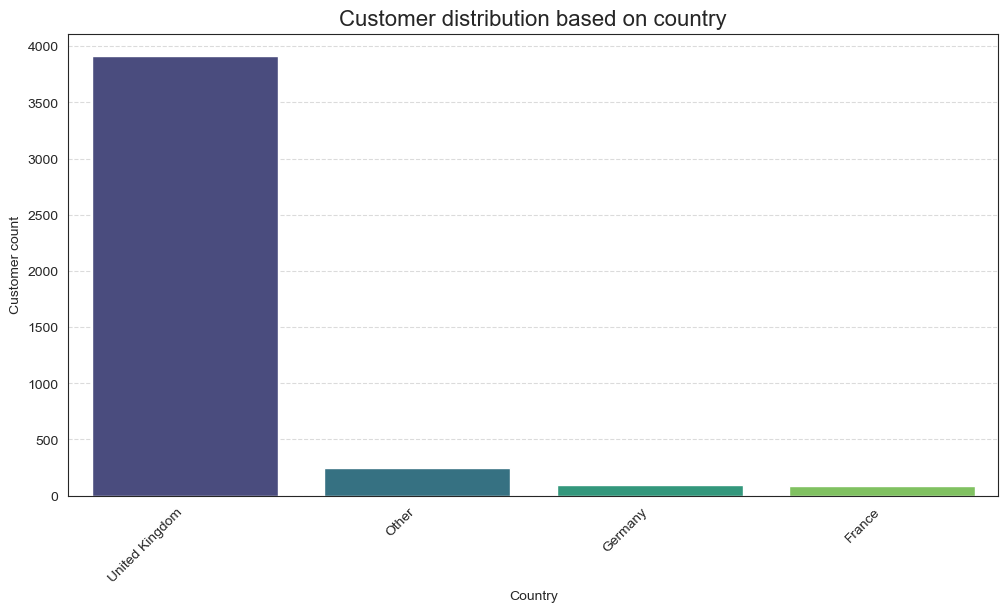

Country
United Kingdom    3916
Other              245
Germany             94
France              87
Name: count, dtype: int64


In [350]:
# Per country customer count
top_countries = rfm_df['Country'].value_counts()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Customer distribution based on country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Customer count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tampilkan angka pastinya
print(top_countries)

#### <b> Descriptive stats dataset

In [351]:
df_final[['Quantity', 'UnitPrice', 'TotalPrice', 'Hour', ]].describe()

,Quantity,UnitPrice,TotalPrice,Hour
count,396473.000000,396473.000000,396473.000000,396473.000000
mean,13.008429,2.884056,22.114375,12.729449
std,179.610569,4.354463,308.846619,2.272978
min,1.000000,0.001000,0.001000,6.000000
25%,2.000000,1.250000,4.680000,11.000000
50%,6.000000,1.950000,11.800000,13.000000
75%,12.000000,3.750000,19.800000,14.000000
max,80995.000000,649.500000,168469.600000,20.000000


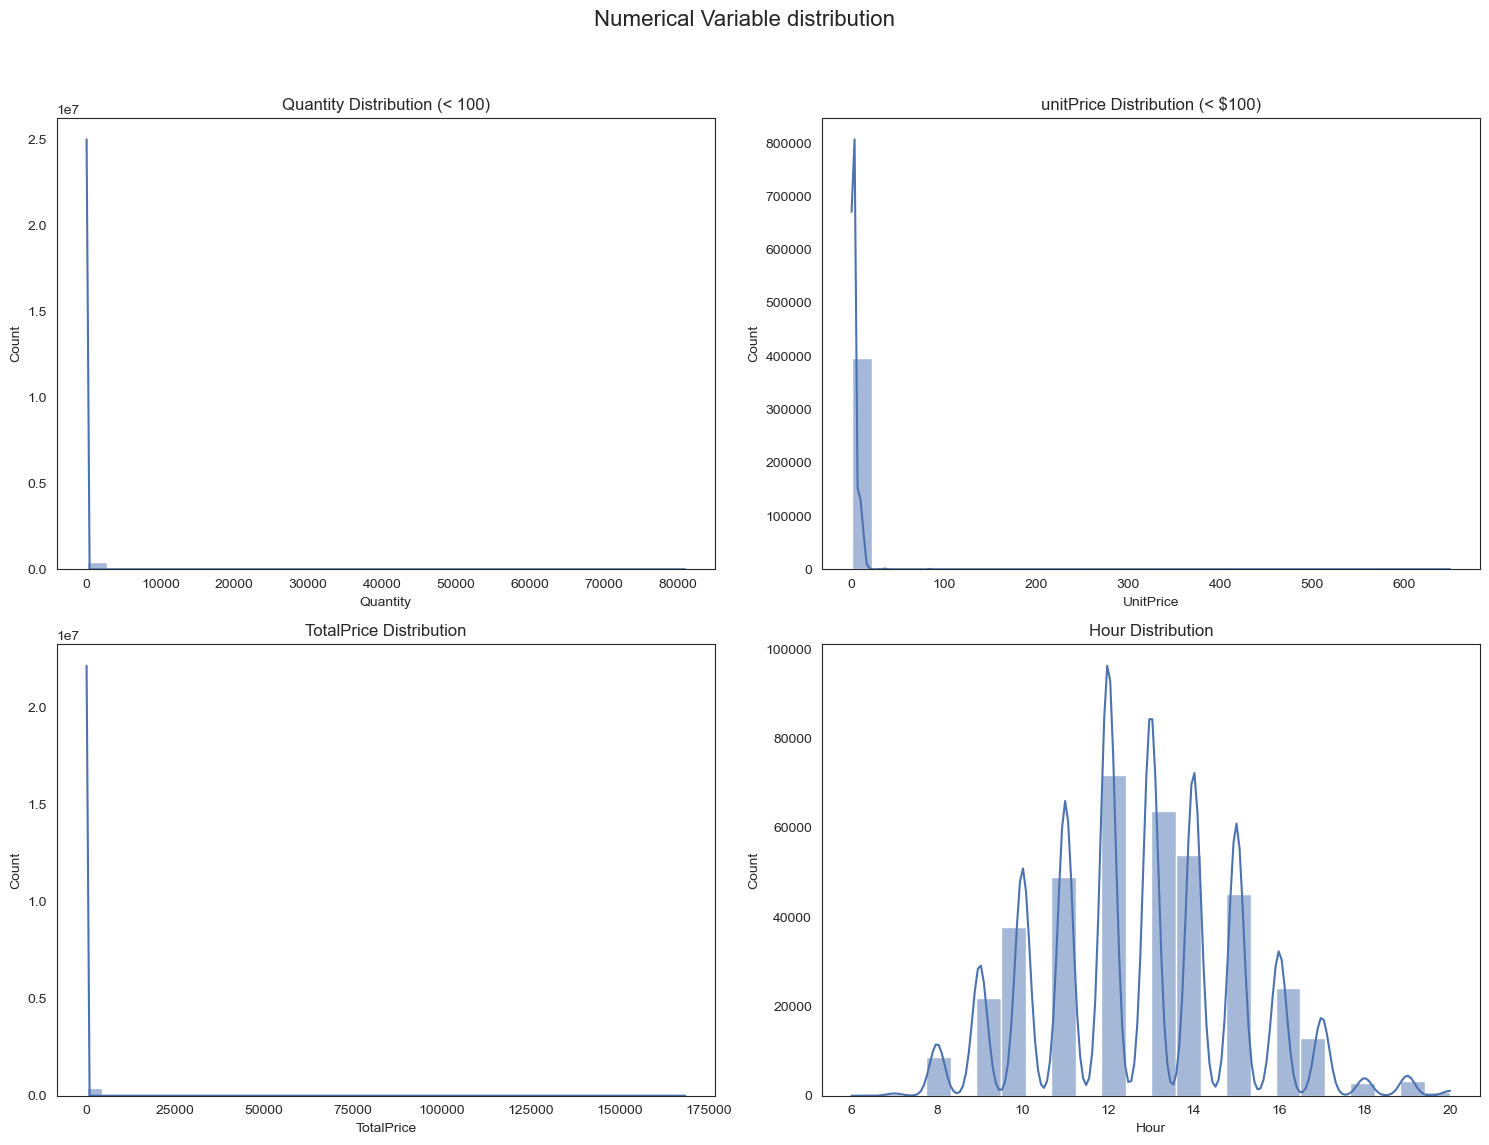

In [352]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Numerical Variable distribution', fontsize=16)

# 1. Quantity Histogram
sns.histplot(df_final['Quantity'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Quantity Distribution (< 100)')

# 2. UnitPrice histogram
sns.histplot(df_final['UnitPrice'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('unitPrice Distribution (< $100)')

# 3. TotalPrice Histogram
sns.histplot(df_final['TotalPrice'], bins=40, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('TotalPrice Distribution')

# 4. Hour histogram
sns.histplot(df_final['Hour'], bins=24, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Hour Distribution')


# Atur layout dan tampilkan plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The typical (median) transaction is the purchase of six items at $1.95 each, resulting in a total spend of approximately $11.80. There are a small number of transactions with very large values, both in terms of quantity and price, which significantly increase the overall average value. Business activity has a clear daily pattern, peaking around midday.

Most customers buy in small quantities, at low unit prices, so their total purchases are also low. This is "typical behavior" of the majority of customers.

Text(0, 0.5, 'Transaction')

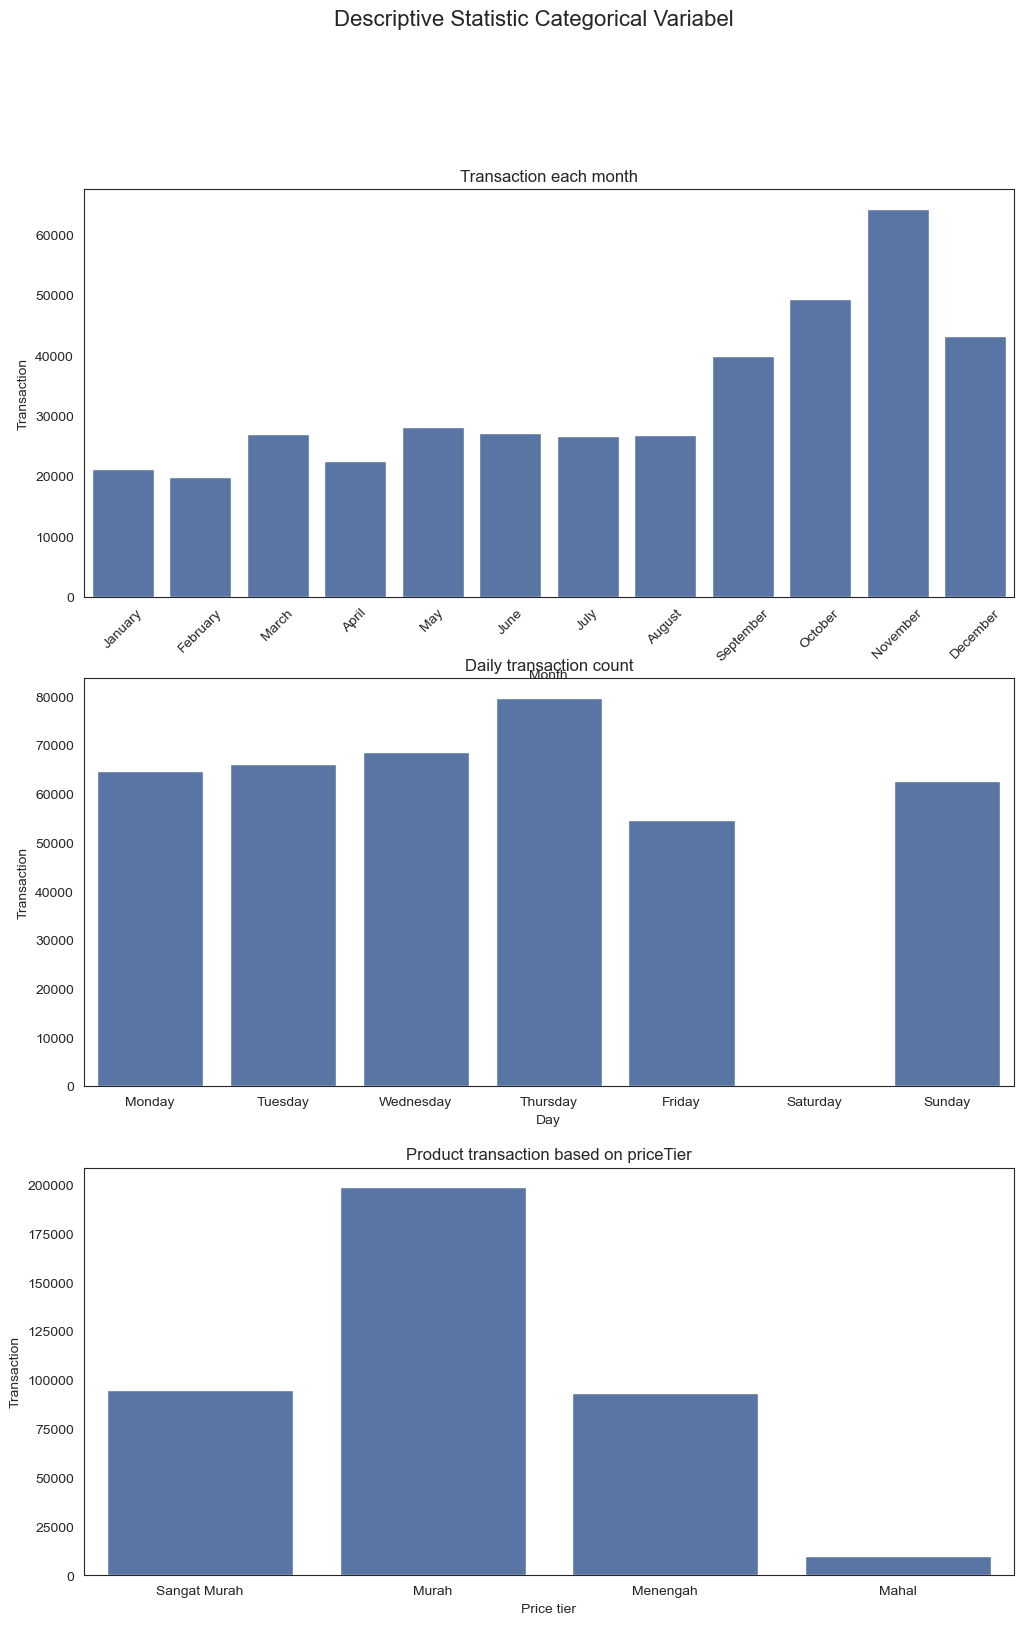

In [353]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Descriptive Statistic Categorical Variabel', fontsize=16)

# Monthly distribution analysis
month_counts = df_final['Month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x=month_counts.index, y=month_counts.values, ax=axes[0], order=month_order)
axes[0].set_title('Transaction each month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Transaction')
axes[0].tick_params(axis='x', rotation=45)


# Daily analysis
day_counts = df_final['Day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[1], order=day_order)
axes[1].set_title('Daily transaction count')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Transaction')


# Pricetier analysis
tier_counts = df_final['PriceTier'].value_counts()
tier_order = ['Sangat Murah', 'Murah', 'Menengah', 'Mahal'] # Sesuaikan dengan label Anda
sns.barplot(x=tier_counts.index, y=tier_counts.values, ax=axes[2], order=tier_order)
axes[2].set_title('Product transaction based on priceTier')
axes[2].set_xlabel('Price tier')
axes[2].set_ylabel('Transaction')


This business has a strong seasonal trend. The last quarter of the year (October, November, and December) is the busiest period. This is likely driven by the end-of-year holiday shopping season, such as Christmas preparations, Black Friday sales, or other shopping events.

This business relies heavily on sales volume of affordable products. "Murah" to "Menegah" products are the backbone of sales.

## Outlier analysis

#### <b> Boxplot distribution numerical variabel dataset

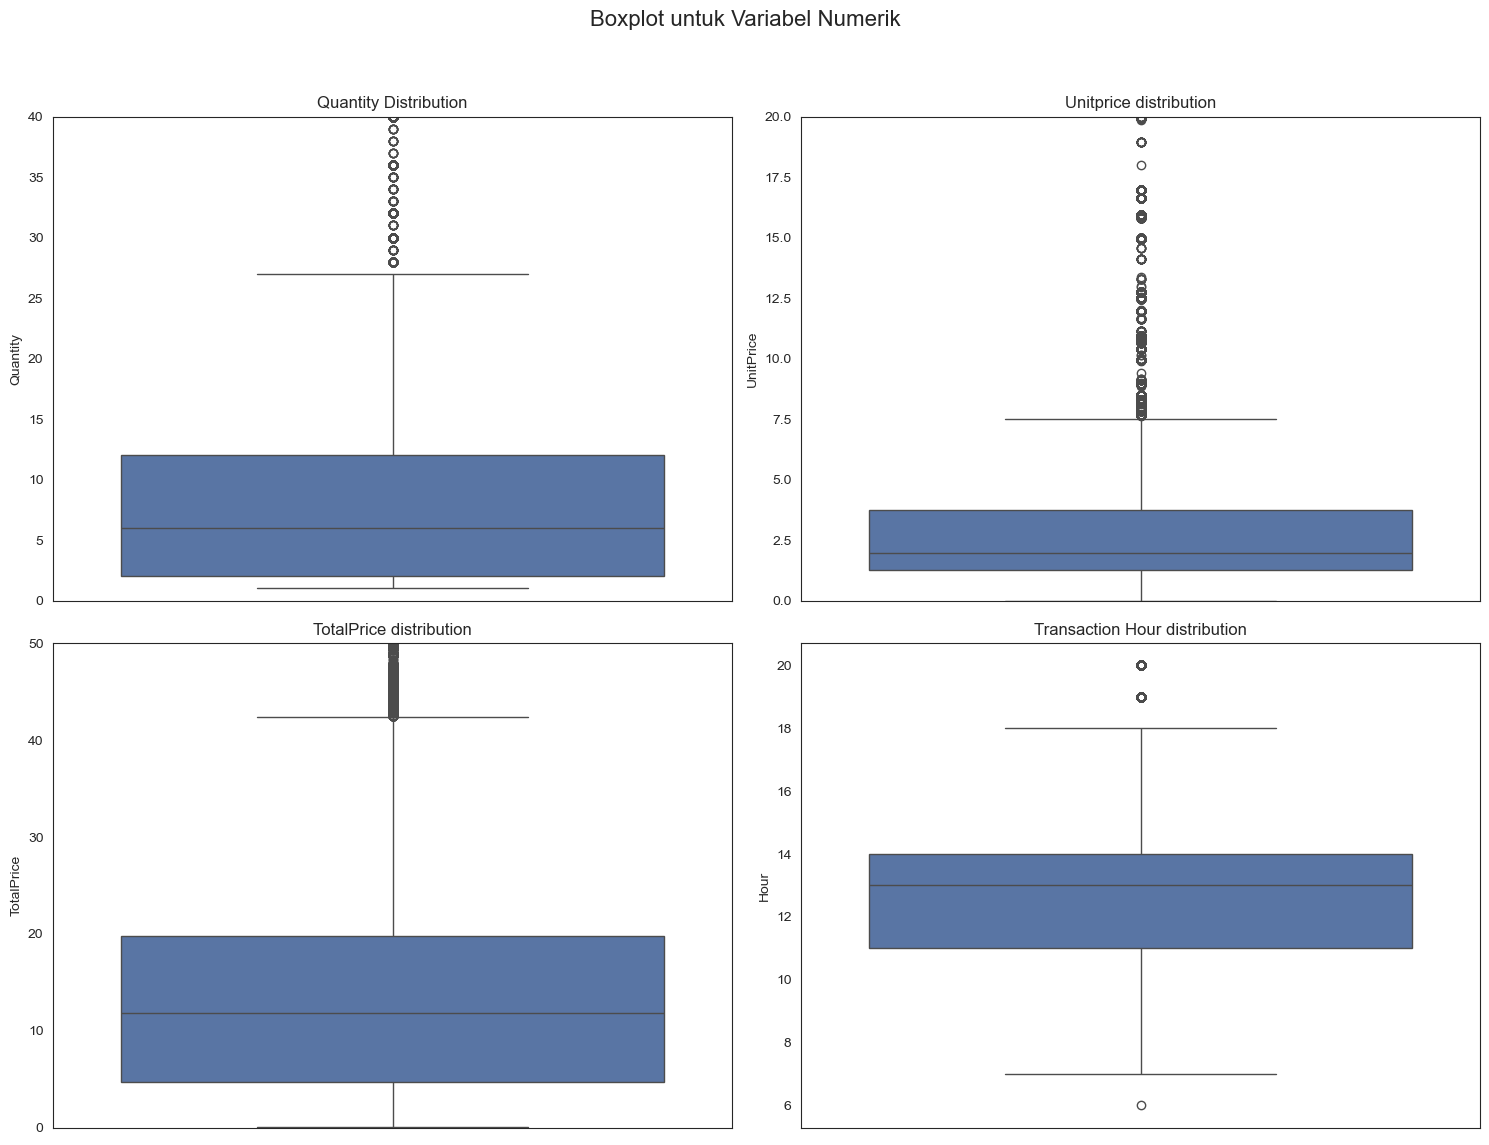

In [354]:
# Buat 4 plot dalam satu gambar (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Boxplot untuk Variabel Numerik', fontsize=16)

#  Quantity
sns.boxplot(y=df_final['Quantity'], ax=axes[0, 0])
axes[0, 0].set_title('Quantity Distribution')
# Atur batas y untuk "zoom in" ke kotak utama, abaikan outlier ekstrem
axes[0, 0].set_ylim(0, 40)

# UnitPrice
sns.boxplot(y=df_final['UnitPrice'], ax=axes[0, 1])
axes[0, 1].set_title('Unitprice distribution')
# Atur batas y untuk "zoom in"
axes[0, 1].set_ylim(0, 20)

# TotalPrice
sns.boxplot(y=df_final['TotalPrice'], ax=axes[1, 0])
axes[1, 0].set_title('TotalPrice distribution')
# Atur batas y untuk "zoom in"
axes[1, 0].set_ylim(0, 50)

# Hour
sns.boxplot(y=df_final['Hour'], ax=axes[1, 1])
axes[1, 1].set_title('Transaction Hour distribution')

# Atur layout dan tampilkan plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [355]:
#function to detect outlier
def find_outliers_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_final[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers

#function to detect outlier
def find_outliers_rfm(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = rfm_df[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers

#### <b> Quantity variabel outlier

In [356]:
# Quantity outlier
quantity_outliers = find_outliers_iqr(df_final['Quantity'])
print("outlier Quantity:")
quantity_outliers.sort_values(by='Quantity', ascending=False).head()

outlier Quantity:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceTier,Hour,Day,Month,Year
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,Murah,9,Friday,December,2011
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,Sangat Murah,10,Tuesday,January,2011
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.00,Sangat Murah,12,Thursday,October,2011
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.00,Sangat Murah,10,Friday,May,2011
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom,3202.92,Sangat Murah,10,Tuesday,February,2011


#### <b> UnitPrice variabel outlier

In [357]:
# 2. UnitPirce Outlier
unitprice_outliers = find_outliers_iqr(df_final['UnitPrice'])
print("outlier UnitPrice:")
unitprice_outliers.sort_values(by='UnitPrice', ascending=False).head()

outlier UnitPrice:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceTier,Hour,Day,Month,Year
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,38970.0,Mahal,15,Friday,June,2011
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098,United Kingdom,649.5,Mahal,15,Friday,June,2011
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406,United Kingdom,295.0,Mahal,14,Monday,January,2011
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.0,14842,United Kingdom,295.0,Mahal,15,Friday,February,2011
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452,United Kingdom,295.0,Mahal,11,Monday,March,2011


Unit price is considered valid data and represents customer transactions (because the item is expensive)

#### <b> TotalPrice Outlier

In [358]:
# 3. TotalPrice Outlier
totalprice_outliers = find_outliers_iqr(df_final['TotalPrice'])
print("outlier TotalPrice:")
totalprice_outliers.sort_values(by='TotalPrice', ascending=False).head()

outlier TotalPrice:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceTier,Hour,Day,Month,Year
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,Murah,9,Friday,December,2011
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,Sangat Murah,10,Tuesday,January,2011
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,Mahal,15,Friday,June,2011
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,Menengah,11,Tuesday,September,2011
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,Murah,12,Tuesday,January,2011


#### <b> Remove quantity and totalPrice outliers

In [359]:
outlier_indices = pd.concat([
    quantity_outliers,
    totalprice_outliers
]).index.unique()

df_final = df_final[~df_final.index.isin(outlier_indices)]

Reasons for not retaining outliers even though they may be valid:     
These outliers represent a fundamentally different type of transaction from the majority. The outliers we remove are transactions that are likely not individual retail purchases, but rather wholesale transactions (for example, in terms of quantity, purchasing 80,000 items). If transaction data does not represent individual transactions, it will distort the analysis results and potentially corrupt them.

#### <b> RFM Dataset Outliers

In [360]:
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,AOV,Country
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,4,6,77183.600000,United Kingdom
12347,2,7,4310.00,4,4,4,12,615.714286,Other
12348,75,4,1437.24,2,3,3,8,359.310000,Other
12349,19,1,1457.55,3,1,3,7,1457.550000,Other
12350,310,1,294.40,1,1,1,3,294.400000,Other


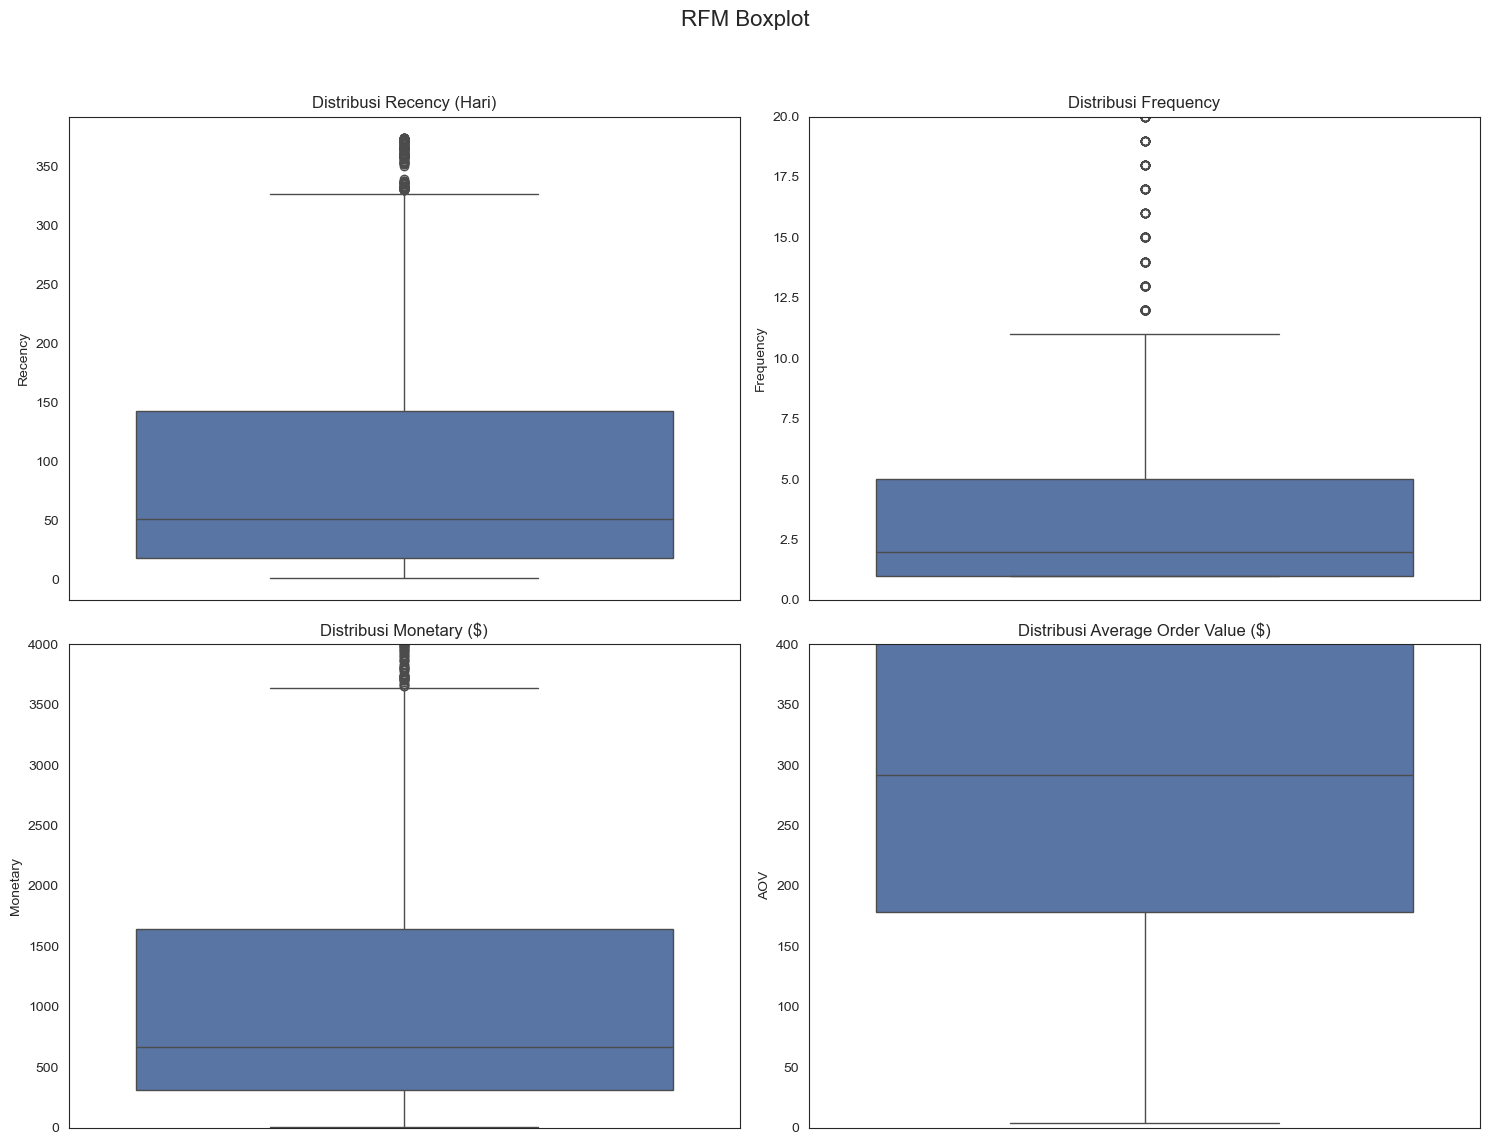

In [361]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('RFM Boxplot', fontsize=16)

# Recency
sns.boxplot(y=rfm_df['Recency'], ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Recency (Hari)')

# Frequency
sns.boxplot(y=rfm_df['Frequency'], ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Frequency')
axes[0, 1].set_ylim(0, 20) 

# Monetary
sns.boxplot(y=rfm_df['Monetary'], ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Monetary ($)')
axes[1, 0].set_ylim(0, 4000)

# Average order Value
sns.boxplot(y=rfm_df['AOV'], ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Average Order Value ($)')
axes[1, 1].set_ylim(0, 400)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [362]:
# Outlier in each variabel
freq_outliers = find_outliers_rfm(rfm_df['Frequency'])
monetary_outliers = find_outliers_rfm(rfm_df['Monetary'])
AOV_outliers = find_outliers_rfm(rfm_df['AOV'])

# Remove outlier
outlier_indices = pd.concat([freq_outliers, monetary_outliers, AOV_outliers]).index.unique()
rfm_df = rfm_df[~rfm_df.index.isin(outlier_indices)]

In [363]:
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,AOV,Country
CustomerID,,,,,,,,,
12348,75,4,1437.24,2,3,3,8,359.310000,Other
12350,310,1,294.40,1,1,1,3,294.400000,Other
12352,36,7,1385.74,3,4,3,10,197.962857,Other
12353,204,1,89.00,1,1,1,3,89.000000,Other
12355,214,1,459.40,1,1,2,4,459.400000,Other


Large transactions that are usually carried out by businesses rather than individuals have been eliminated.

## Pattern analysis

#### <b> Monthly visit analysis

In [364]:
# Revenue per month by year data
df_2011 = df_final[df_final["Year"] == 2011]
df_2010 = df_final[df_final["Year"] == 2010]

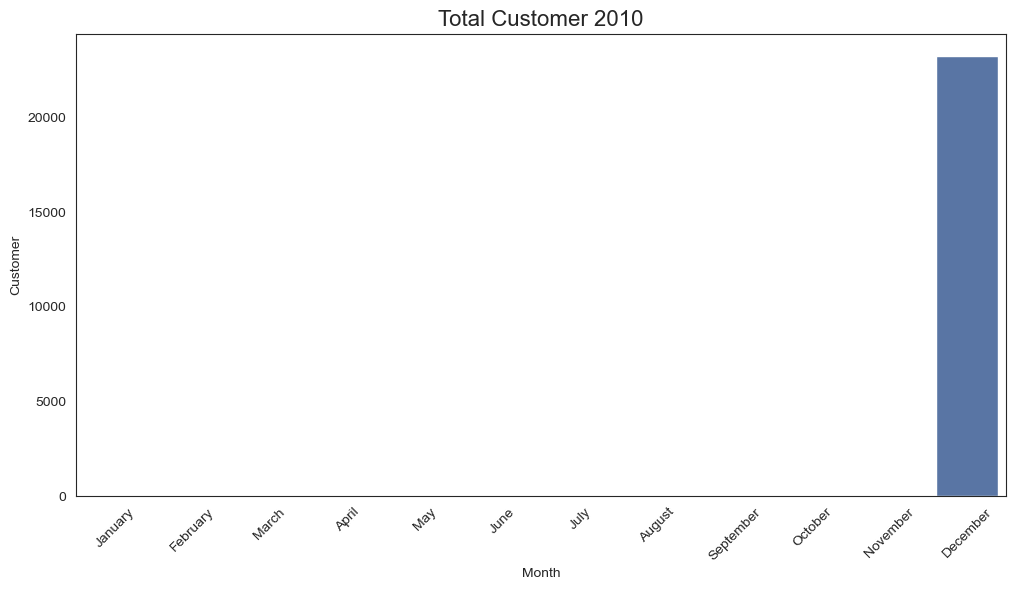

In [365]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_visit = df_2010.groupby('Month')['CustomerID'].count().reindex(month_order)

default_color = sns.color_palette("pastel")[0]
highlight_color = sns.color_palette("deep")[0]
colors = [highlight_color if month in ['September', 'October', 'November', 'December'] else default_color for month in monthly_visit.index]

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_visit.index, y=monthly_visit.values, palette=colors)
plt.title('Total Customer 2010', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.xticks(rotation=45)
plt.show()

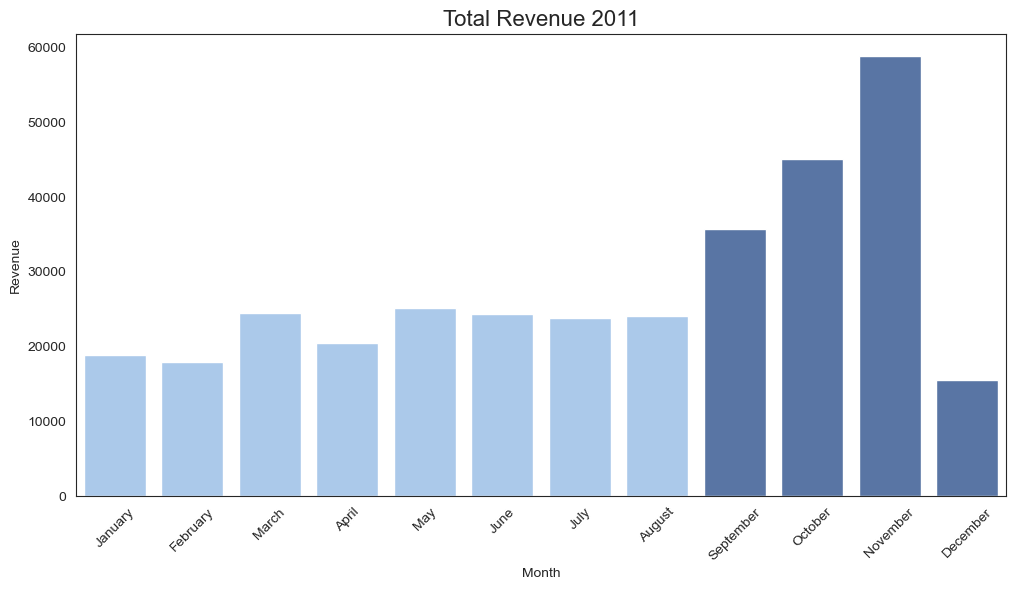

In [ ]:
monthly_visit = df_2011.groupby('Month')['CustomerID'].count().reindex(month_order)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_visit.index, y=monthly_visit.values, palette=colors)
plt.title('Total Customer 2011', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.xticks(rotation=45)
plt.show()

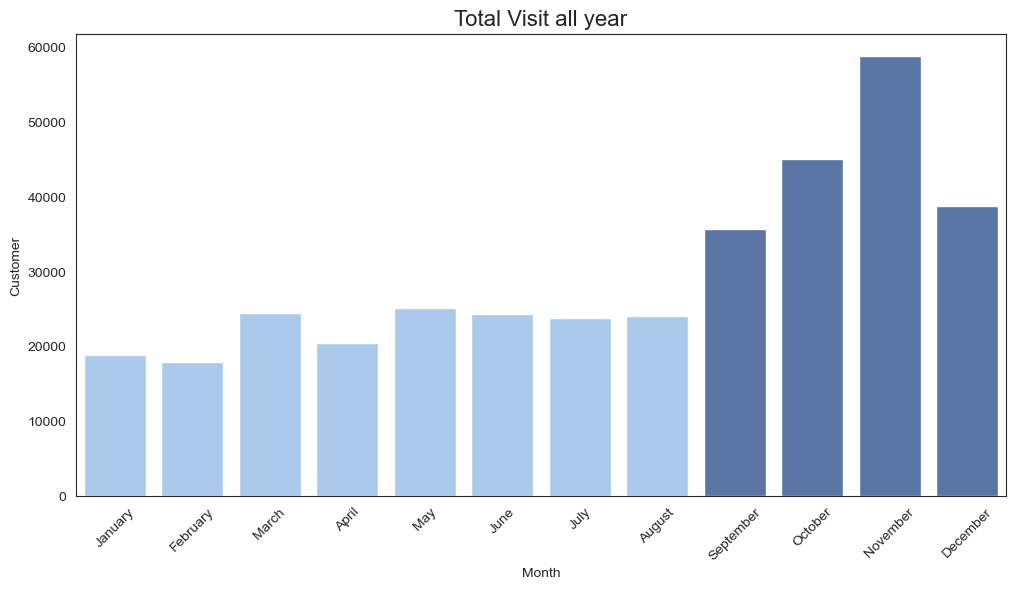

In [367]:
monthly_visit = df_final.groupby('Month')['TotalPrice'].count().reindex(month_order)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_visit.index, y=monthly_visit.values, palette=colors)
plt.title('Total Visit all year', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.xticks(rotation=45)
plt.show()

Stores experience a peak season from the end of the third quarter through the fourth quarter (Q4). November is the busiest month, while the first eight months show flat customer visits. After experiencing a peak in November, stores tend to experience a decline in December.

#### <b> Revenue trend analysis

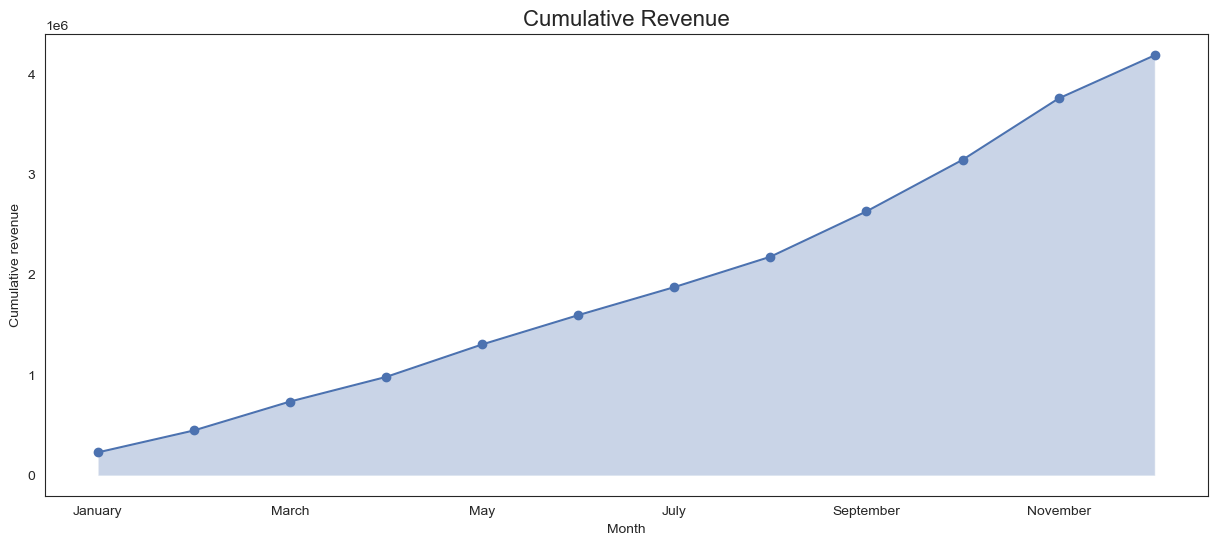

In [368]:
# Revenue data
monthly_growth = df_final.groupby('Month')['TotalPrice'].sum()

# Order month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_growth = monthly_growth.reindex(month_order).fillna(0)
cumulative_growth = monthly_growth.cumsum()

# Visualize
plt.figure(figsize=(15, 6))
cumulative_growth.plot(kind='line', marker='o')
plt.title('Cumulative Revenue', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Cumulative revenue')
plt.fill_between(cumulative_growth.index, cumulative_growth.values, alpha=0.3)
plt.show()

The consistently rising line indicates that the company is consistently generating revenue. By the end of the period (November), total revenue collected had exceeded 8 million.

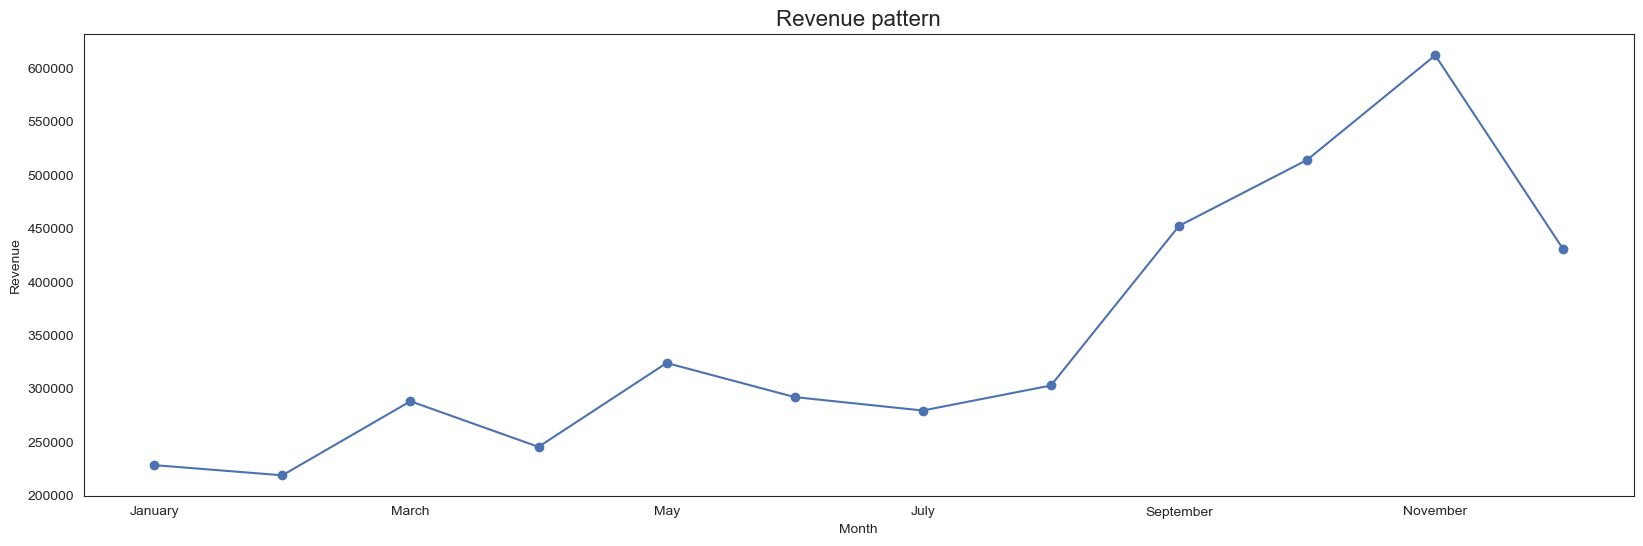

In [369]:
monthly_growth = df_final.groupby('Month')['TotalPrice'].sum()
monthly_growth = monthly_growth.reindex(month_order).fillna(0)

plt.figure(figsize=(20, 6))
monthly_growth.plot(kind='line', marker='o')
plt.title('Revenue pattern', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

This chart confirms that the business has a very strong sales cycle in the third and fourth quarters (start from august). November was the most profitable month. Conversely, the first half of the year showed weaker performance and requires strategies to increase sales during that period.

#### <b> Market analysis outside UK

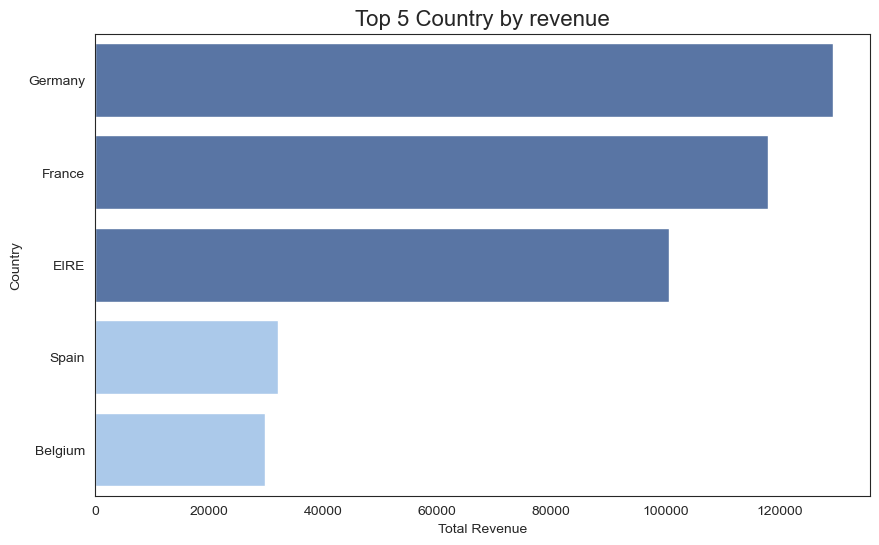

In [370]:
outside_revenue = df_final[df_final['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

colors = [highlight_color, highlight_color, highlight_color, default_color, default_color]
plt.figure(figsize=(10, 6))
sns.barplot(y=outside_revenue.index, x=outside_revenue.values, palette=colors)
plt.title('Top 5 Country by revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

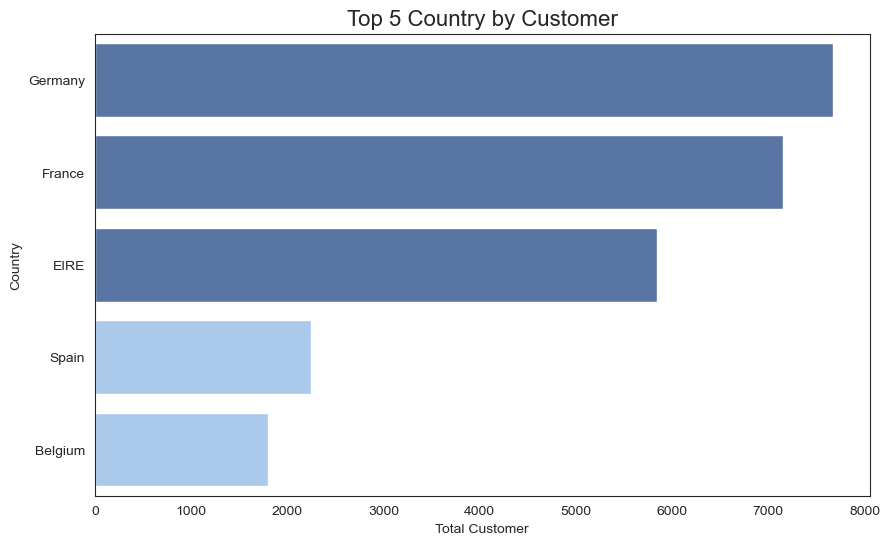

In [371]:
outside_cust = df_final[df_final['Country'] != 'United Kingdom'].groupby('Country')['CustomerID'].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(y=outside_cust.index, x=outside_cust.values, palette=colors)
plt.title('Top 5 Country by Customer', fontsize=16)
plt.xlabel('Total Customer')
plt.ylabel('Country')
plt.show()

Best plans to expand the market by total customer and revenue generated, Prioritize resources to expand in Germany, France and EIRE, There needs to be an evaluation of whether resources are worth allocating to expansion in the Spanish and Belgian markets. 

<b> Customer Recency, Frequency, Monetary Distribution


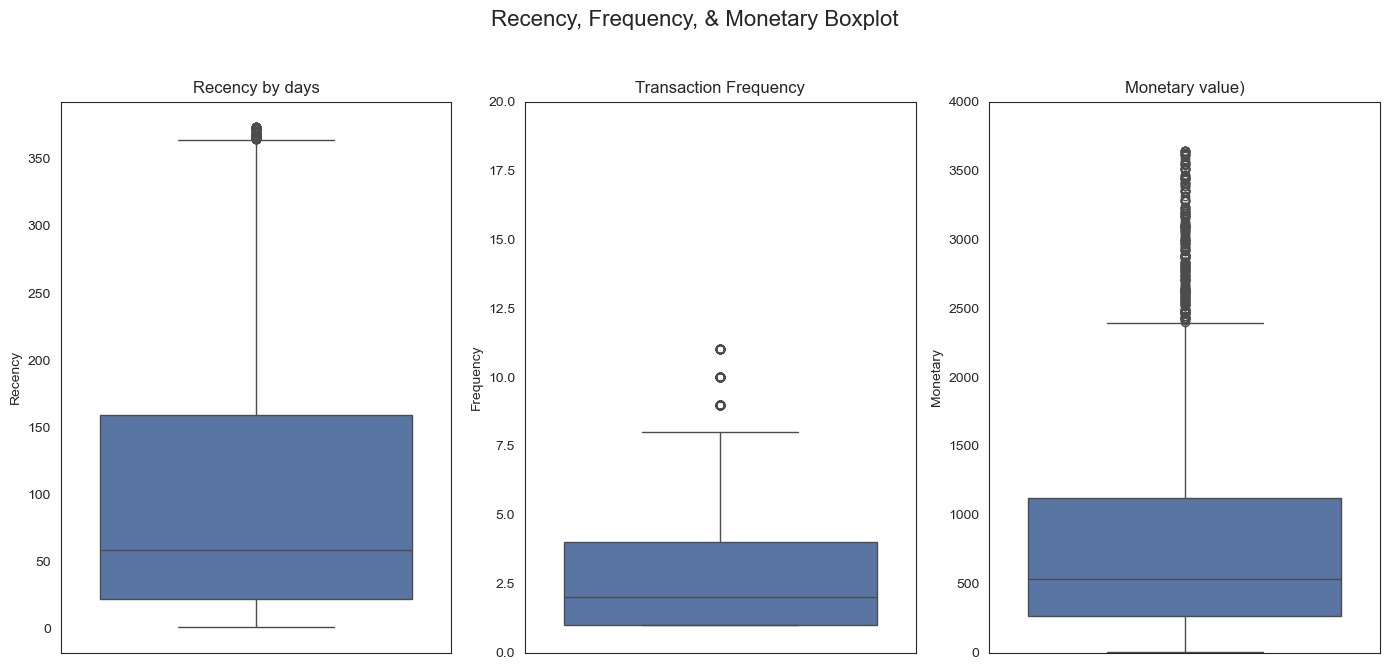

In [372]:
fig, axes = plt.subplots(1, 3, figsize=(14, 7))
fig.suptitle('Recency, Frequency, & Monetary Boxplot', fontsize=16)

sns.boxplot(y=rfm_df['Recency'], ax=axes[0])
axes[0].set_title('Recency by days')

sns.boxplot(y=rfm_df['Frequency'], ax=axes[1])
axes[1].set_title('Transaction Frequency')
axes[1].set_ylim(0, 20) 

sns.boxplot(y=rfm_df['Monetary'], ax=axes[2])
axes[2].set_title('Monetary value)')
axes[2].set_ylim(0, 4000)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### <b> Customer seasonality pattern

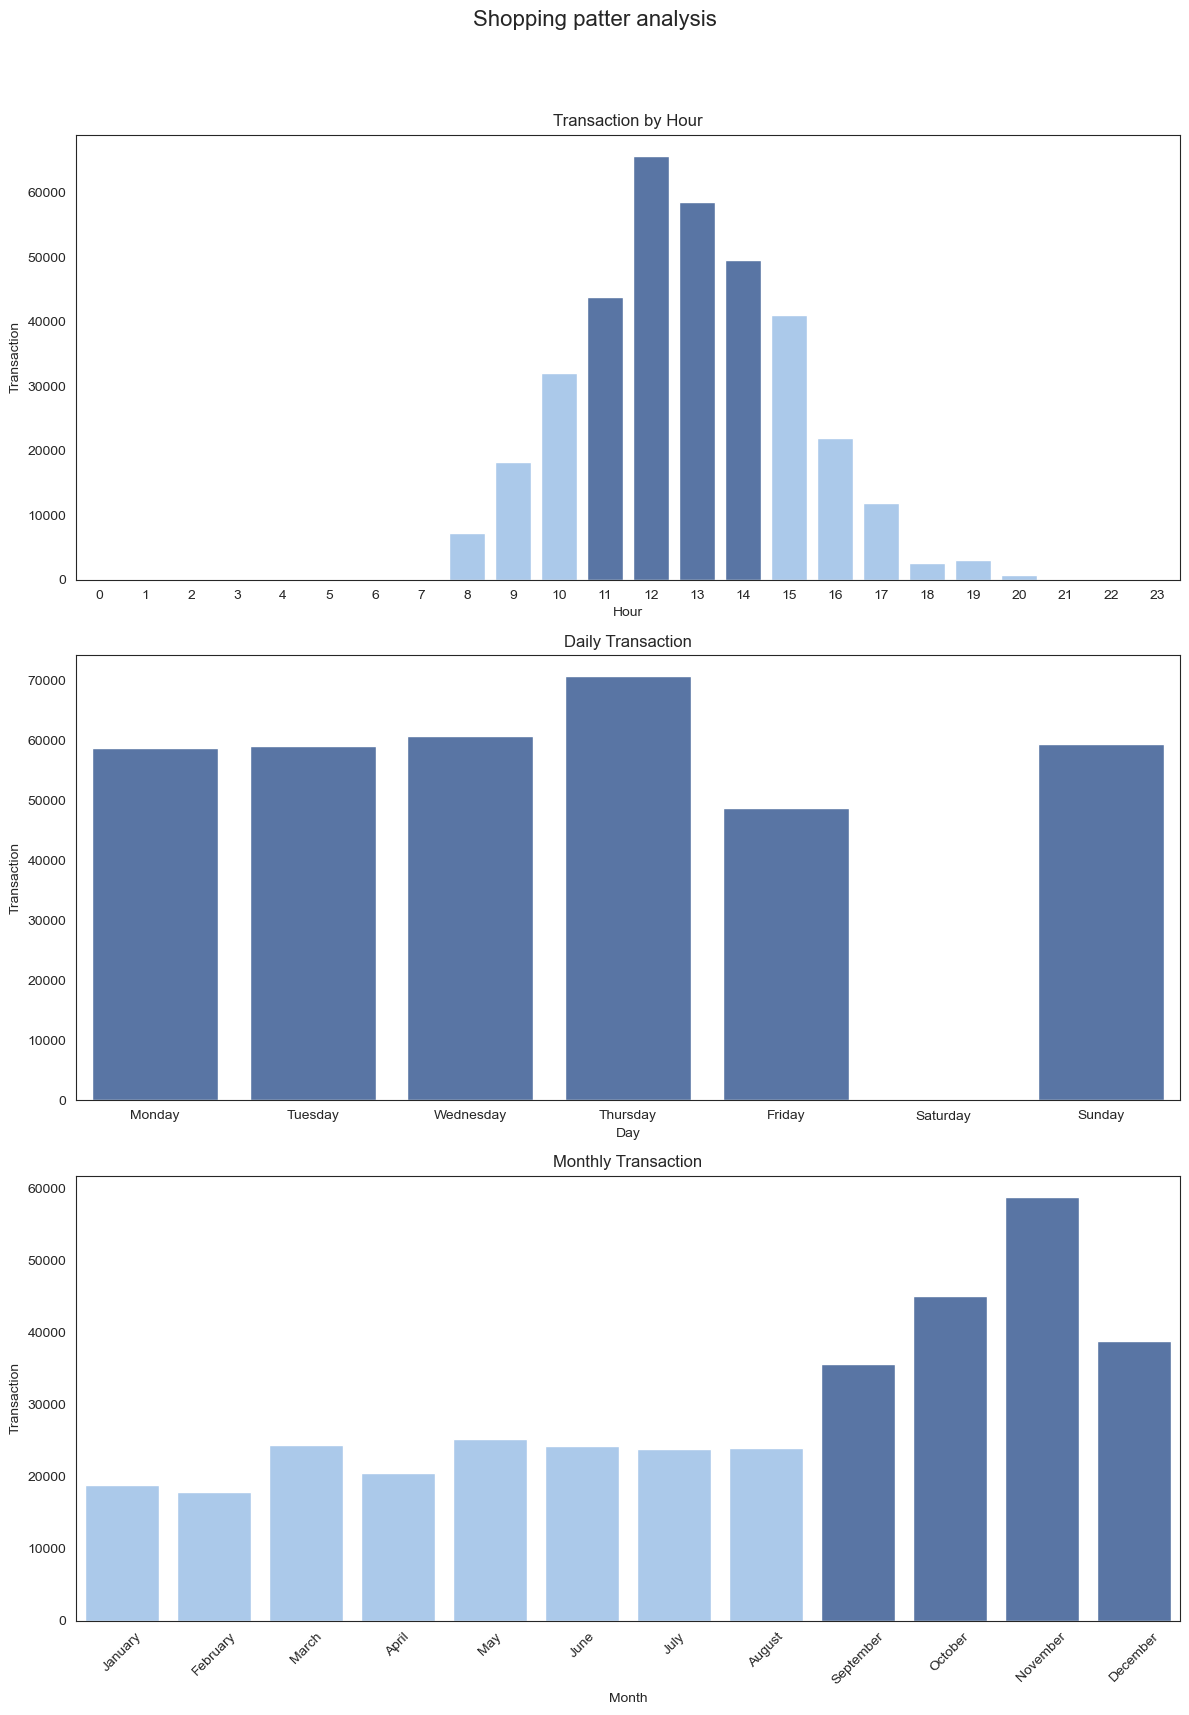

In [377]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Shopping patter analysis", fontsize=16)

hours_to_highlight = [11, 12, 13, 14]
colors_h = [highlight_color if i in hours_to_highlight else default_color for i in range(24)]

sns.countplot(x=df_final['Hour'], ax=axes[0], order=range(24), palette=colors_h)
axes[0].set_title('Transaction by Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Transaction')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df_final['Day'], ax=axes[1], order=day_order)
axes[1].set_title('Daily Transaction')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Transaction')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors_m = [highlight_color if i in ['September', 'October', 'November', 'December'] else default_color for i in month_order]
sns.countplot(x=df_final['Month'], ax=axes[2], order=month_order, palette=colors_m)
axes[2].set_title('Monthly Transaction')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Transaction')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The peak daily transaction volume occurs at 12 noon, with activity also very high at 11 a.m. and 1 p.m. This indicates that the lunch period is a prime shopping time.
There is no significant difference across days; transactions tend to be stable on all days. Monthly, the end of the third quarter through the fourth quarter is indeed peak season.

#### <b> Customer Transaction Analysis

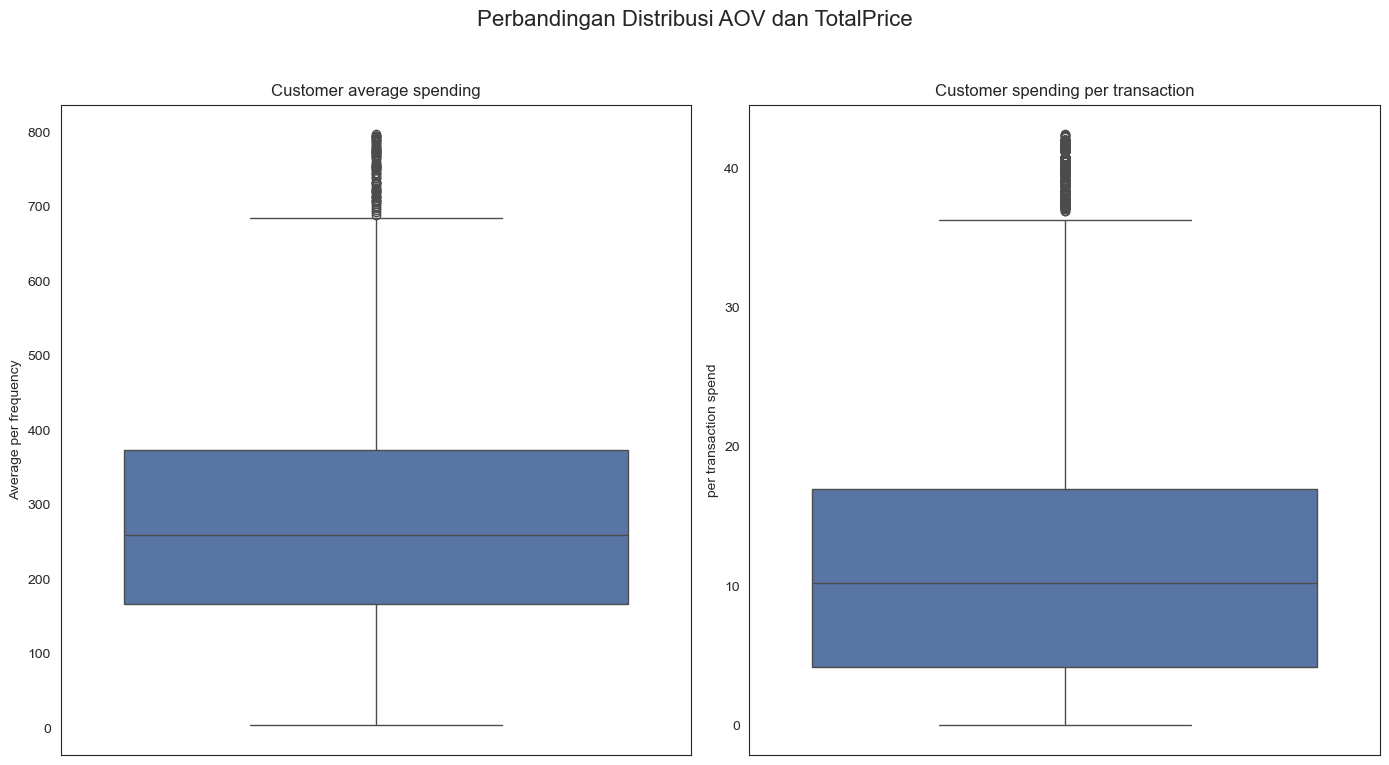

In [374]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Perbandingan Distribusi AOV dan TotalPrice', fontsize=16)

sns.boxplot(y=rfm_df['AOV'], ax=axes[0])
axes[0].set_title('Customer average spending')
axes[0].set_ylabel('Average per frequency')

sns.boxplot(y=df_final['TotalPrice'], ax=axes[1])
axes[1].set_title('Customer spending per transaction')
axes[1].set_ylabel('per transaction spend')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

While the value per single transaction tends to be small (median only 10), the average total spend per customer is much higher (median 260). This strongly indicates that the majority of customers are repeat buyers. They may not spend much on a single visit, but they keep coming back again and again.

                 count       mean       std  min  25%   50%   75%   max
PriceTier                                                              
Sangat Murah   81791.0  11.183529  8.524714  1.0  3.0  12.0  20.0  27.0
Murah         184827.0   6.820914  5.567188  1.0  2.0   6.0  12.0  27.0
Menengah       83271.0   2.782890  1.768620  1.0  1.0   2.0   4.0  11.0
Mahal           7277.0   1.468187  0.631965  1.0  1.0   1.0   2.0   4.0


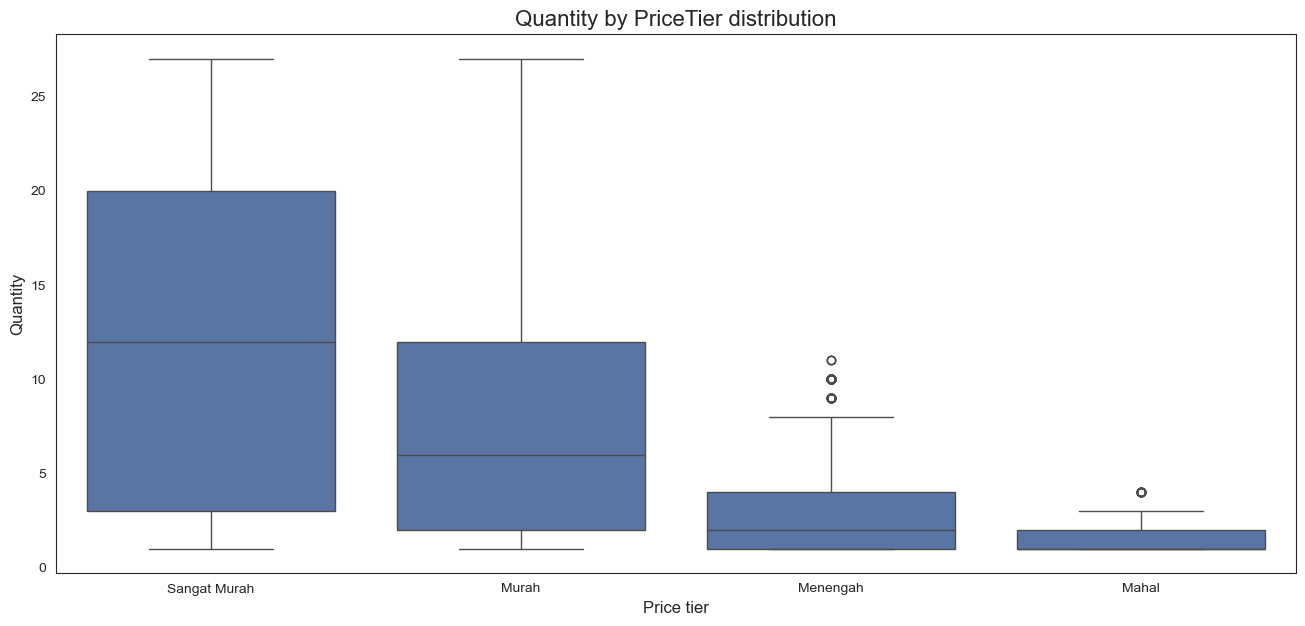

In [375]:
# Summary table priceTier per transaction (count)
price_tier_analysis = df_final.groupby('PriceTier')['Quantity'].describe()
print(price_tier_analysis)

plt.figure(figsize=(16, 7))
sns.boxplot(data=df_final, x='PriceTier', y='Quantity', order=['Sangat Murah', 'Murah', 'Menengah', 'Mahal'])

# Menambahkan judul dan label
plt.title('Quantity by PriceTier distribution', fontsize=16)
plt.xlabel('Price tier', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

plt.show()

There is a clear inverse relationship between the price of a product and the amount (quantity) purchased per transaction. For each transaction, the more expensive the price category of an item, the less the quantity purchased by the customer.

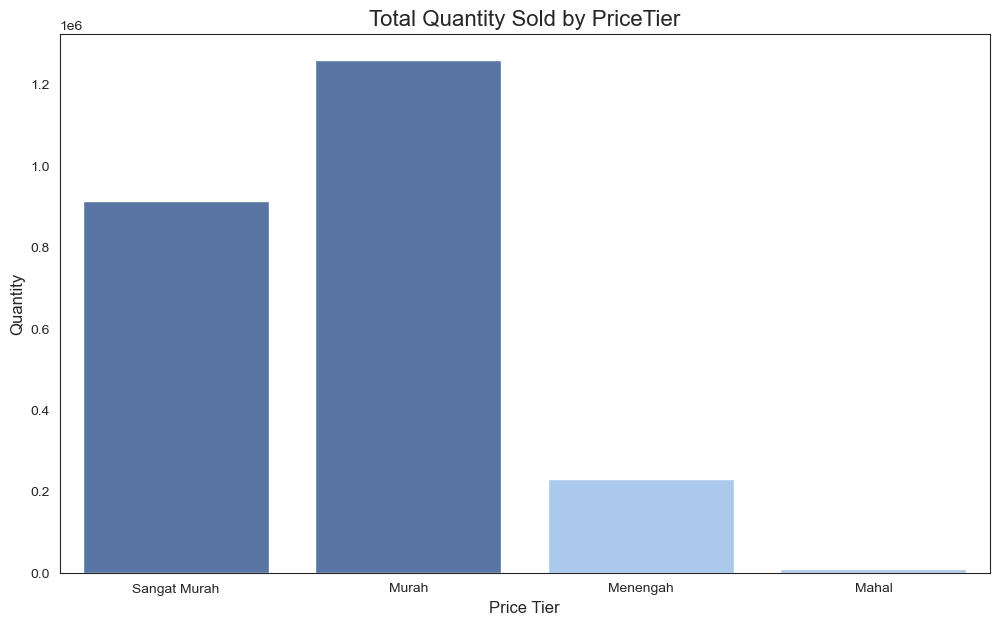

In [376]:
total_quantity_per_tier = df_final.groupby('PriceTier')['Quantity'].sum()
tier_order = ['Sangat Murah', 'Murah', 'Menengah', 'Mahal']
total_quantity_per_tier = total_quantity_per_tier.reindex(tier_order)

colors_qty = [highlight_color if tier in ['Murah', 'Sangat Murah'] else default_color for tier in total_quantity_per_tier.index]


plt.figure(figsize=(12, 7))
sns.barplot(x=total_quantity_per_tier.index, y=total_quantity_per_tier.values, palette=colors_qty)
plt.title('Total Quantity Sold by PriceTier', fontsize=16)
plt.xlabel('Price Tier', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

plt.show()

Quantity sales success depends heavily on the ability to sell "Cheap" and "Very Cheap" products in large quantities. Higher-priced products contribute very little to total units sold.